In [4]:
#Import necessary modules
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#Load the digits dataset: digits
digits = datasets.load_digits()

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
#Create feature and target arrays
X = digits.data
y = digits.target

In [9]:
#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [10]:
#Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [12]:
#Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In [14]:
#Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [21]:
#Loop over different values of k
for i, k in enumerate(neighbors):
    #Setup a k-NN with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the classifier to training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on testing set
    test_accuracy[i] = knn.score(X_test, y_test)

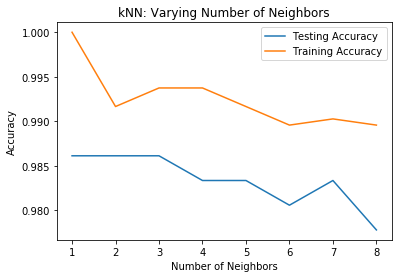

In [22]:
#Generate plot
plt.title('kNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
#Conclusion: As we can see from the plot, the test accuracy is highest when using 3 and 5 neighbors,
#7 isn't too bad 
#but using 8 neighbors or more seems to result in a simple model that under fits the data

# 2. Support vector machine

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, svm, metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report

digits = datasets.load_digits()

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [64]:
SVC_poly = SVC(kernel='poly')

SVC_poly.fit(X_train, y_train)

y_poly_pred = SVC_poly.predict(X_test)

print(classification_report(y_test, y_poly_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.94      0.96        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [57]:
SVC_sigmoid = SVC(kernel='sigmoid')

SVC_sigmoid.fit(X_train, y_train)

y_sigmoid_pred = SVC_sigmoid.predict(X_test)

print(classification_report(y_test, y_sigmoid_pred))

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.33      0.06      0.10        36
           2       0.00      0.00      0.00        35
           3       0.10      1.00      0.19        37
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        36

    accuracy                           0.11       360
   macro avg       0.04      0.11      0.03       360
weighted avg       0.04      0.11      0.03       360



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
print(test_accuracy)

[0.98611111 0.98611111 0.98611111 0.98333333 0.98333333 0.98055556
 0.98333333 0.97777778]


In [ ]:
#Conclusion: Avg of Poly Kernel is the highest one.

# 3. Naive Bayes

In [66]:
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [59]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

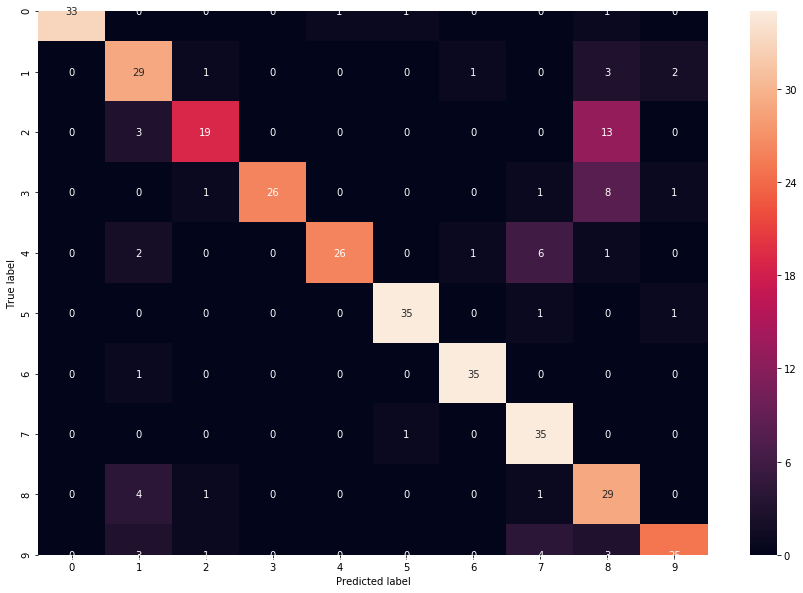

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Text(0, 0.5, 'Accuracy')

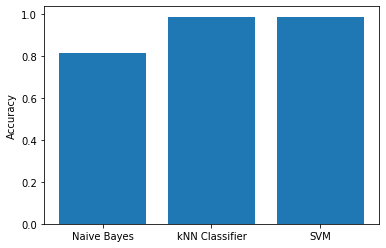

In [69]:
bayes_acc = accuracy_score(y_test, y_pred)
knn_acc = max(test_accuracy)
svm_acc = accuracy_score(y_test, y_poly_pred)

plt.bar(['Naive Bayes', 'kNN Classifier', 'SVM'],[bayes_acc, knn_acc, svm_acc])
plt.ylabel('Accuracy')

# Regression

# 1. Linear Regression

In [1]:
import pandas as pd
import seaborn as sn

df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


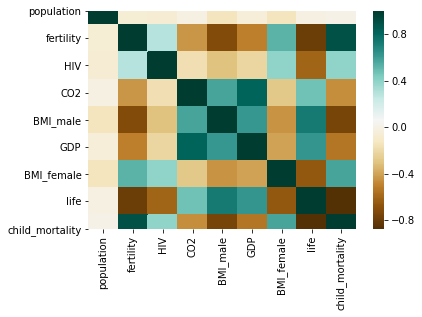

In [2]:
sn.heatmap(df.corr(), cmap='BrBG')

In [3]:
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
slr = LinearRegression()
X = df['fertility'].values.reshape(-1, 1) 
X = X.astype('float')
y = df['life'].values.reshape(-1, 1)
y = y.astype('float')
slr.fit(X, y)
y_pred = slr.predict(X)

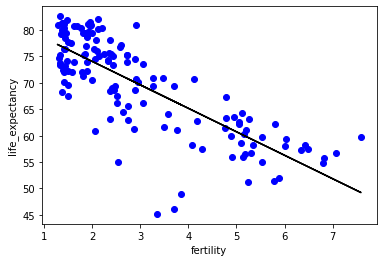

In [5]:
plt.scatter (X, y, c = 'blue')
plt.plot (X, y_pred, color = 'black')
plt.xlabel('fertility')
plt.ylabel('life_expectancy')
plt.show()

In [6]:
features = list(df.columns)
features = features[:-1]
features.pop(7)

'life'

In [7]:
features

['population',
 'fertility',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'child_mortality']

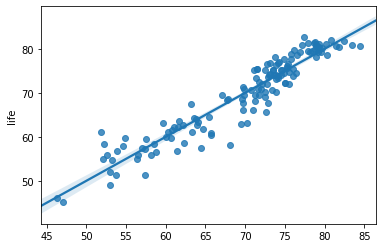

In [8]:
X_all = df[features]
slr.fit(X_all, y)
y_pred_all = slr.predict(X_all)
y_all = df['life']

sn.regplot(y_pred_all, y_all)

In [10]:
from sklearn.model_selection import cross_val_score
score_fertility = cross_val_score(slr, X, y)
print('Fertility: ', score_fertility)

Fertility:  [0.75397745 0.55557583 0.57886144]


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [11]:
score_fertility = cross_val_score(slr, X_all, y_all)
print("All features: ", score_fertility)

All features:  [0.83699524 0.87875694 0.89986165]


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
